In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
df = pd.read_csv('../data/new_sales4.csv', encoding='euc-kr')
df['수량추정'].replace(np.inf, 1, inplace=True)

purch_times = df.groupby('고객번호', as_index=False)['구매금액'].count().rename(columns={'구매금액': '구매회수'})
df = pd.merge(df, purch_times, on='고객번호', how='left')

ext_df = df[df['구매회수'] != 1]
ext_df = ext_df[(ext_df['물품대분류'] == '1단계') | (ext_df['물품대분류'] == '2단계') | (ext_df['물품대분류'] == '3단계') |
                (ext_df['물품대분류'] == '4단계') | (ext_df['물품대분류'] == '5단계') | (ext_df['물품대분류'] == '6단계') |
                (ext_df['물품대분류'] == '7단계') | (ext_df['물품대분류'] == '수유용품') | (ext_df['물품대분류'] == '티슈') | (ext_df['물품대분류'] == '이벤트')]
ext_df

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율,구매회수
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,201905,0.37,2
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,5단계,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26,2
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,3단계,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21,2
5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,3단계,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),3.421622,201907,0.24,2
8,201906302542644,2019-06-30,2019-07-01,2019-07-03,NaN,201812310749783,52100,37110,수유용품,더블하트 SofTouch 모유실감 노꼭지트윈팩 240ml(오렌지) + SofTouc...,1.000000,201906,0.29,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199507,20200727062932-97104092254,2020-07-27,2020-07-28,2020-07-30,2.0,201912281057997,2600,2570,5단계,좋은느낌 순수 울트라 날개 대형 16개입 (EA),1.000000,202007,0.01,3
199510,201912283245106,2019-12-29,2019-12-30,2020-01-01,0.0,201912281058006,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,2
199511,20200521172454-86563196093,2020-05-22,2020-05-23,2020-05-25,3.0,201912281058006,5900,5900,3단계,NEW 하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩) (EA),1.000000,202005,0.00,2
199514,201912283245152,2019-12-29,2019-12-30,2020-01-02,-3.0,201912281058012,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,2


In [165]:
first_df = ext_df.drop_duplicates(subset='고객번호', keep='first')
second_df = pd.concat([ext_df, first_df]).drop_duplicates(keep=False).drop_duplicates(subset='고객번호', keep='first')

first_df = first_df[['고객번호', '물품대분류', '구매일']].rename(columns={'물품대분류': '첫번째구매', '구매일': '첫번째구매일'})
second_df = second_df[['고객번호', '물품대분류', '구매일']].rename(columns={'물품대분류': '두번째구매', '구매일': '두번째구매일'})
chungsung = pd.merge(first_df, second_df, on='고객번호', how='left')
chungsung.dropna(inplace=True)
chungsung

,고객번호,첫번째구매,첫번째구매일,두번째구매,두번째구매일
0,201812310749735,수유용품,2019-05-06,5단계,2020-02-20
1,201812310749774,3단계,2019-05-10,3단계,2019-07-29
2,201812310749783,수유용품,2019-06-30,3단계,2019-07-23
3,201812310749784,이벤트,2019-04-29,3단계,2019-06-25
4,201812310749787,2단계,2019-01-01,2단계,2019-01-21
...,...,...,...,...,...
32946,201912281057953,5단계,2020-01-29,5단계,2020-02-25
32947,201912281057954,3단계,2020-02-04,이벤트,2020-03-04
32951,201912281057997,2단계,2020-07-07,5단계,2020-07-27
32952,201912281058006,이벤트,2019-12-29,3단계,2020-05-22


Text(0.5, 1.0, '첫 구매 이후 두번째 구매 물품의 수량')

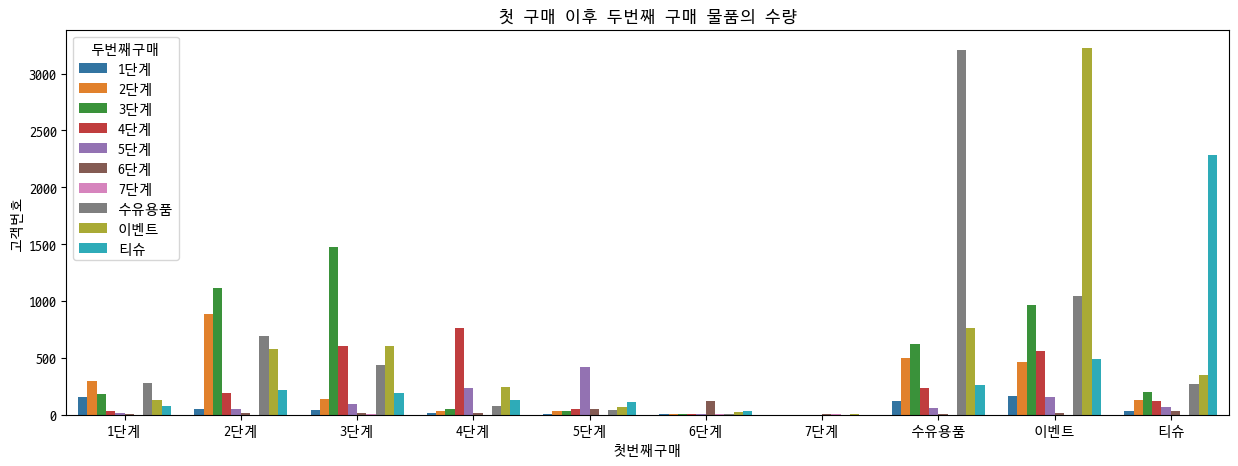

In [166]:
chungsung_grouped = chungsung.groupby(['첫번째구매', '두번째구매'], as_index=False).count().iloc[:, :3]

plt.figure(figsize=(15, 5))
sns.barplot(data=chungsung_grouped, x='첫번째구매', y='고객번호', hue='두번째구매')
plt.title('첫 구매 이후 두번째 구매 물품의 수량')

# 

,구매월,할인율
0,2019-01,0.313312
1,2019-02,0.278660
2,2019-03,0.275686
3,2019-04,0.279977
4,2019-05,0.278571
5,2019-06,0.268340
6,2019-07,0.275264
7,2019-08,0.258705
8,2019-09,0.249207
9,2019-10,0.283464


<AxesSubplot: >

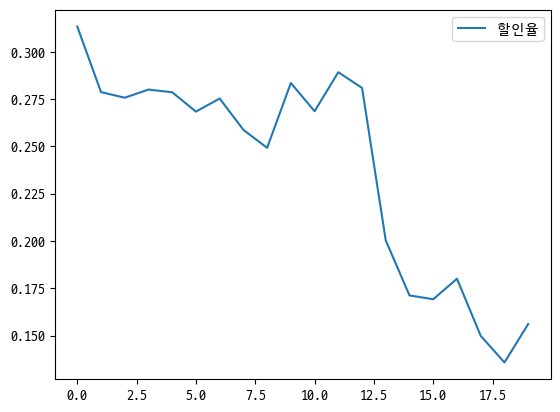

In [49]:
df = pd.read_csv('../data/new_sales4.csv', encoding='euc-kr')
df = df[df['상품명'] != '맘큐 허그박스']
df = df.drop_duplicates(subset='고객번호', keep='first')
df['구매월'] = pd.to_datetime(df['구매일']).dt.to_period('M')
grouped = df.groupby('구매월', as_index=False)['할인율'].mean()

grouped.plot()
# sns.lineplot(data=grouped, x='구매월', y='할인율')